<a href="https://colab.research.google.com/github/JAEHYEONG8121/Pytorch-Tutorial/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGG

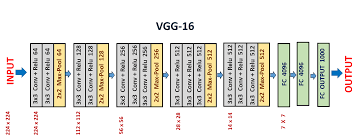

**VGG-16 architecture**

- input (224x224 RGB image)
- [Conv3-64] x2 → Max Pool(2x2, stride=2 -> half)
- [Conv3-128] x2 → Max Pool
- [Conv3-256] x3 → Max Pool
- [Conv3-512] x3 → Max Pool
- [Conv3-512] x3 → Max Pool
- Fully Connected x3 → Softmax



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [3]:
VGG_types = {
    'VGG11' : [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13' : [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']
}

# Then flatten and 4096x4096x1000 Linear Layers

class VGG_net(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG_types['VGG16'])
    self.fcs = nn.Sequential(
        nn.Linear(512*7*7, 4096), # 224/(2**5) = 7, we have 5 MaxPool
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, num_classes)
        )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fcs(x)
    return x

  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int :
        out_channels = x

        layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                             kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
                             nn.BatchNorm2d(x),
                             nn.ReLU(x)]
        in_channels = x
      elif x == 'M':
        layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

    return nn.Sequential(*layers)

In [4]:
model = VGG_net(in_channels=3, num_classes=1000)
x = torch.randn(1, 3, 224, 224)
print(model(x).shape)

torch.Size([1, 1000])
